In [138]:
from keras.layers import Conv2D,  MaxPooling2D, AveragePooling2D, Input, Dense, BatchNormalization, Flatten, Concatenate
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import plot_model, to_categorical
from keras import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
img = load_img('/content/dog.jpg', color_mode='grayscale')
img = img_to_array(img)
print(img.shape)

(900, 1200, 1)


In [ ]:
img = img * 1 / (img.max() - img.min())
img

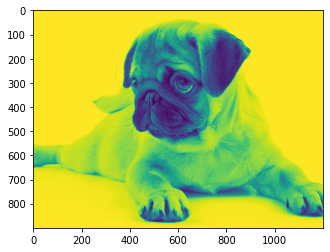

In [14]:
plt.imshow(img.reshape(900,1200))

In [31]:
tar = to_categorical(np.array([1]))

In [32]:
tar

array([[0., 1.]], dtype=float32)

In [195]:

inputs = Input(shape=(28,28,1))
conv = Dense(32, activation='linear')(inputs)
conv1 = Conv2D(64,2, activation='relu',padding='same')(conv)
conv2 = Conv2D(32,2, activation='relu',padding='same')(conv1)
concat = Concatenate(axis=1)([conv,conv2])
x = AveragePooling2D()(concat)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)
x = Dense(32, activation='tanh')(x)
flatten = Flatten()(x)
out = Dense(10, activation = 'softmax')(flatten)

model = Model(inputs,out)
model.summary()

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 28, 28, 32)   64          input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 28, 28, 64)   8256        dense_17[0][0]                   
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 28, 28, 32)   8224        conv2d_43[0][0]                  
___________________________________________________________________________________________

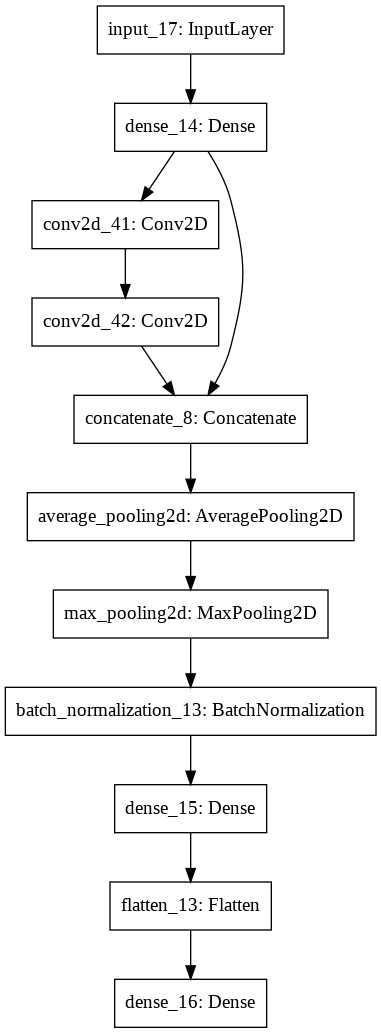

In [178]:
plot_model(model)

In [145]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [146]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [147]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [148]:
import tensorflow as tf
from sklearn.metrics import f1_score, roc_auc_score
validation_data=(X_test,y_test)
class Metrics(tf.keras.callbacks.Callback):
  def __init__(self):
    super().__init__()
    
  def on_train_begin(self, logs={}):
    self.f1_Score = []
    self.auc = []
  
  def on_epoch_end(self, epoch, logs={}):
   
    val_predict_round = np.asarray(self.model.predict(validation_data[0])).round()
    val_predict = np.asarray(self.model.predict(validation_data[0]))
    val_targ = validation_data[1]
    
    f1 = f1_score(val_targ, val_predict_round,average='micro')
   
    self.f1_Score.append(f1)
    self.auc.append(roc_auc_score(val_targ,val_predict))
    print('— val_f1_score: {0} — auc: {1}'.format(f1, roc_auc_score(val_targ,val_predict)))
    return
 
metrics = Metrics()

In [196]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10, callbacks=[metrics])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2660 - accuracy: 0.9150 - val_loss: 0.0766 - val_accuracy: 0.9757
— val_f1_score: 0.9760184627734296 — auc: 0.9996898259922735
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.0563 - val_accuracy: 0.9805
— val_f1_score: 0.9807259073842303 — auc: 0.9998343302473451
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0493 - val_accuracy: 0.9833
— val_f1_score: 0.9836311758522301 — auc: 0.9998541879811906
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0472 - val_accuracy: 0.9844
— val_f1_score: 0.9847847847847849 — auc: 0.999832119409988
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0419 - val_accuracy: 0.9864
— val_f1_score: 0.986738727918731 — a

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
for i in range(pred.shape[0]):
  #print(pred[i])
  for j in range(pred[i].shape[0]):
    pred[j] = (pred[j].round())

In [57]:
from PIL import Image 
test_img = Image.open('/content/dog.jpg')
#print(type(test_img))
test_img = test_img.resize((28,28))
#print(type(test_img))
test_img = img_to_array(test_img)
test_img  *= 1 / (test_img.max() - test_img.min())
test_img.shape

(28, 28, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


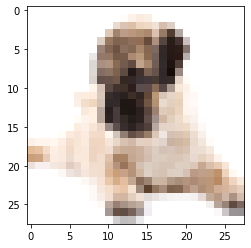

In [58]:
plt.imshow(test_img)

In [59]:
test_img = (tf.image.rgb_to_grayscale(test_img))
test_img.shape

TensorShape([28, 28, 1])

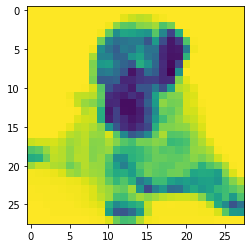

In [60]:
plt.imshow(tf.reshape(test_img,(28,28)))

In [180]:
test_img = tf.reshape(test_img,(1,28,28,1))
model.predict(test_img)

array([[5.0428500e-03, 8.3725142e-01, 2.5077481e-02, 1.5750109e-03,
        1.8186915e-04, 3.6273252e-02, 2.3008259e-03, 9.1385372e-02,
        6.0893966e-05, 8.5103855e-04]], dtype=float32)

In [197]:
for i in model.layers:
  print(i.name)

input_18
dense_17
conv2d_43
conv2d_44
concatenate_9
average_pooling2d_1
max_pooling2d_1
batch_normalization_14
dense_18
flatten_14
dense_19


In [233]:
#source: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
def visualize_kernels_performance(layer_number,test_img,trained_model): 
  from keras import Model
  print('Plotting kernel performance for layer : '+ str(trained_model.layers[layer_number].name),'\n','*'*100)
  ixs = [layer_number]
  outputs = [model.layers[i].output for i in ixs]
  mod = Model(inputs=trained_model.inputs, outputs=outputs)
  
  bn_out = mod.predict(test_img)

  rows = 8
  cols = 4
  #for fmap in bn_out:
  # plot all 64 maps in an 8x8 squares
  plt.figure(figsize=(30,20))
  #plt.imshow(tf.reshape(test_img,(28,28)))
  fmap = bn_out
  ix = 1
  for _ in range(rows):
    for _ in range(2):
      ax = plt.subplot(rows, cols, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title('kernel:'+str(ix))
      plt.imshow(fmap[0, :, :, ix-1],cmap='gray')
      ix += 1
  plt.show()
  return

Plotting kernel performance for layer : conv2d_44 
 ****************************************************************************************************


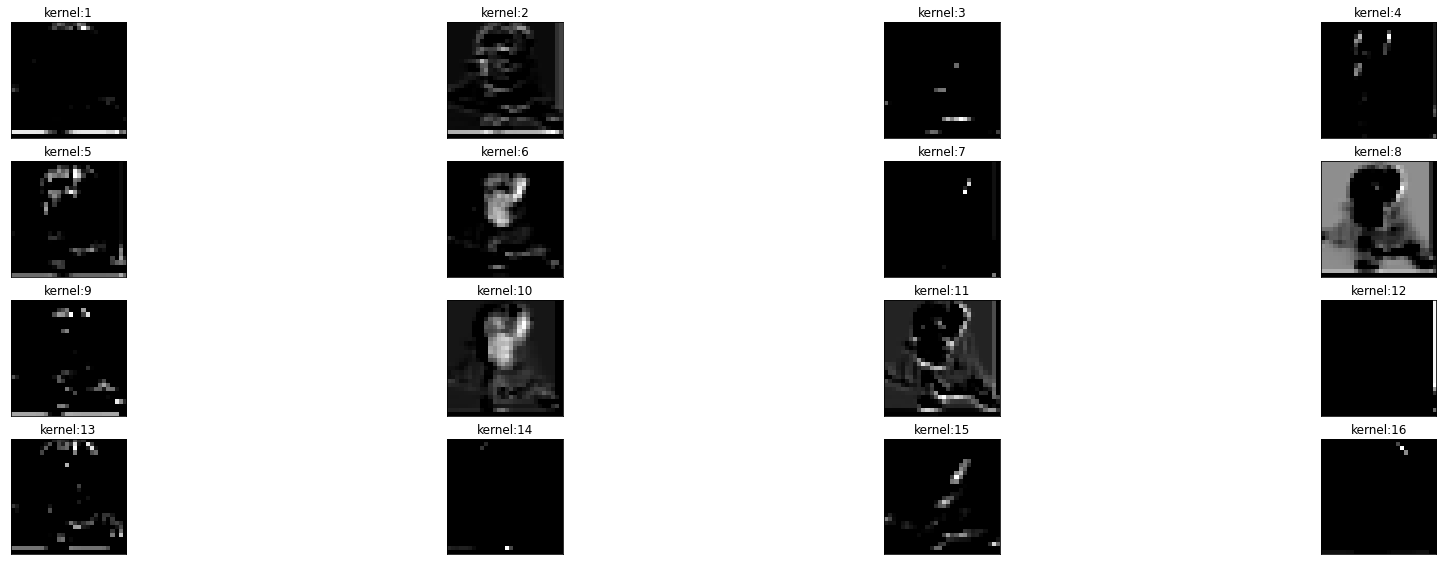

In [234]:
visualize_kernels_performance(3,test_img,model)